In [1]:
"""
Created on Fri Apr 28 11:00:00 2017

@author: Batul Zamin
"""

'\nCreated on Fri Apr 28 11:00:00 2017\n\n@author: Batul Zamin\n'

## Multi-class Classification with Keras

### Import statements

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import losses

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [4]:
data = pd.read_csv('letter-recognition.csv', header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
dataset = data.values

In [7]:
dataset

array([['T', 2, 8, ..., 8, 0, 8],
       ['I', 5, 12, ..., 8, 4, 10],
       ['D', 4, 11, ..., 7, 3, 9],
       ..., 
       ['T', 6, 9, ..., 12, 2, 4],
       ['S', 2, 3, ..., 9, 5, 8],
       ['A', 4, 9, ..., 7, 2, 8]], dtype=object)

In [8]:
X = dataset[: , 1:].astype(float)
Y = dataset[:, :1]

In [9]:
X

array([[  2.,   8.,   3., ...,   8.,   0.,   8.],
       [  5.,  12.,   3., ...,   8.,   4.,  10.],
       [  4.,  11.,   6., ...,   7.,   3.,   9.],
       ..., 
       [  6.,   9.,   6., ...,  12.,   2.,   4.],
       [  2.,   3.,   4., ...,   9.,   5.,   8.],
       [  4.,   9.,   6., ...,   7.,   2.,   8.]])

In [10]:
Y

array([['T'],
       ['I'],
       ['D'],
       ..., 
       ['T'],
       ['S'],
       ['A']], dtype=object)

In [11]:
X.shape

(20000, 16)

In [12]:
Y.shape

(20000, 1)

### Train and test data

In [13]:
x_train = X[:15000]
y_train = Y[:15000]
x_test = X[15000:]
y_test = Y[15000:]

In [14]:
y_train = [ord(y_train[i][0]) - 65 for i in range(len(y_train))]
y_train = np.array(y_train).reshape(15000,1)

In [15]:
y_test = [ord(y_test[i][0]) - 65 for i in range(len(y_test))]
y_test = np.array(y_test).reshape(5000,1)

In [16]:
batch_size = 128
num_classes = 26
epochs = 5

In [17]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model functions

In [18]:
def build_model(layers):
    model = Sequential()
    for i in range(layers):
        model.add(Dense(500, activation='relu', input_shape=(16,)))
    model.add(Dense(26, activation='sigmoid'))
    model.compile(optimizer=RMSprop(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
    return model

In [19]:
def fit_model(model, callback=None):
    history = model.fit(x_train, 
                        y_train, 
                        batch_size=batch_size, 
                        epochs=epochs, 
                        callbacks=callback, 
                        validation_split=0.2, 
                        verbose=2)
    return history

In [20]:
def plot_accuracy(history):
    x = [1, 2, 3, 4, 5]
    plt.plot(x, history.history['acc'])
    plt.plot(x, history.history['val_acc'])
    plt.title('model accuracy')
    plt.xticks(x)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [21]:
def train_and_test_accuracy(history, model):
    train_acc = history.history['acc'][-1]
    loss1, test_acc = model.evaluate(x_test, y_test, verbose=2)
    return train_acc, test_acc

## Models from 1 hidden layer to 10 hidden layers

### Model - 1

In [22]:
model1 = build_model(1)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               8500      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                13026     
Total params: 21,526
Trainable params: 21,526
Non-trainable params: 0
_________________________________________________________________


In [23]:
history1 = fit_model(model1)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
2s - loss: 1.9863 - acc: 0.4466 - val_loss: 1.5265 - val_acc: 0.5073
Epoch 2/5
1s - loss: 1.3121 - acc: 0.6342 - val_loss: 1.1920 - val_acc: 0.6567
Epoch 3/5
2s - loss: 1.1357 - acc: 0.6763 - val_loss: 1.0628 - val_acc: 0.6813
Epoch 4/5
1s - loss: 1.0226 - acc: 0.7091 - val_loss: 1.0260 - val_acc: 0.6810
Epoch 5/5
1s - loss: 0.9366 - acc: 0.7304 - val_loss: 0.8969 - val_acc: 0.7410


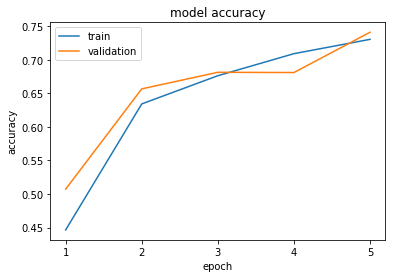

In [24]:
plot_accuracy(history1)

In [25]:
train_acc1, test_acc1 = train_and_test_accuracy(history1, model1)

### Model - 2

In [26]:
model2 = build_model(2)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               8500      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_5 (Dense)              (None, 26)                13026     
Total params: 272,026
Trainable params: 272,026
Non-trainable params: 0
_________________________________________________________________


In [27]:
history2 = fit_model(model2)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
7s - loss: 1.8531 - acc: 0.4509 - val_loss: 1.0493 - val_acc: 0.6797
Epoch 2/5
7s - loss: 1.0245 - acc: 0.6859 - val_loss: 0.9195 - val_acc: 0.7133
Epoch 3/5
7s - loss: 0.7728 - acc: 0.7538 - val_loss: 0.6225 - val_acc: 0.8040
Epoch 4/5
7s - loss: 0.6274 - acc: 0.8009 - val_loss: 0.5357 - val_acc: 0.8307
Epoch 5/5
9s - loss: 0.5067 - acc: 0.8396 - val_loss: 0.4062 - val_acc: 0.8777


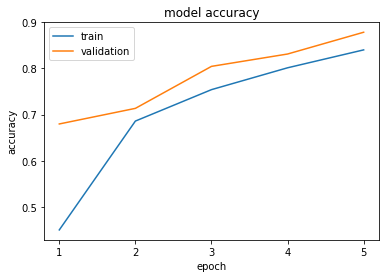

In [28]:
plot_accuracy(history2)

In [29]:
train_acc2, test_acc2 = train_and_test_accuracy(history2, model2)

### Model - 3

In [30]:
model3 = build_model(3)
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               8500      
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 26)                13026     
Total params: 522,526
Trainable params: 522,526
Non-trainable params: 0
_________________________________________________________________


In [31]:
history3 = fit_model(model3)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
15s - loss: 1.7722 - acc: 0.4658 - val_loss: 1.1512 - val_acc: 0.6223
Epoch 2/5
11s - loss: 0.9097 - acc: 0.7073 - val_loss: 0.6897 - val_acc: 0.7687
Epoch 3/5
9s - loss: 0.6544 - acc: 0.7848 - val_loss: 0.5634 - val_acc: 0.8177
Epoch 4/5
9s - loss: 0.4924 - acc: 0.8363 - val_loss: 0.4067 - val_acc: 0.8690
Epoch 5/5
9s - loss: 0.3971 - acc: 0.8718 - val_loss: 0.5009 - val_acc: 0.8277


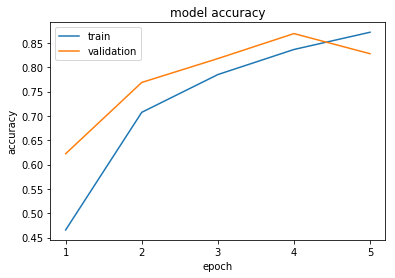

In [32]:
plot_accuracy(history3)

In [33]:
train_acc3, test_acc3 = train_and_test_accuracy(history3, model3)

### Model - 4

In [34]:
model4 = build_model(4)
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               8500      
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_14 (Dense)             (None, 26)                13026     
Total params: 773,026
Trainable params: 773,026
Non-trainable params: 0
_________________________________________________________________


In [35]:
history4 = fit_model(model4)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
20s - loss: 1.8444 - acc: 0.4428 - val_loss: 0.9910 - val_acc: 0.6750
Epoch 2/5
16s - loss: 0.9146 - acc: 0.7020 - val_loss: 0.5817 - val_acc: 0.8150
Epoch 3/5
20s - loss: 0.6373 - acc: 0.7913 - val_loss: 0.3730 - val_acc: 0.8747
Epoch 4/5
20s - loss: 0.4577 - acc: 0.8505 - val_loss: 0.3304 - val_acc: 0.8847
Epoch 5/5
18s - loss: 0.3749 - acc: 0.8786 - val_loss: 0.2902 - val_acc: 0.9027


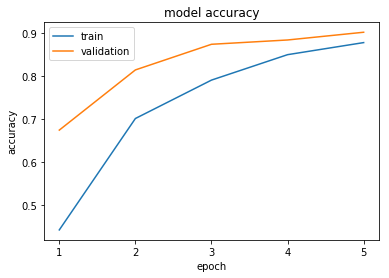

In [36]:
plot_accuracy(history4)

In [37]:
train_acc4, test_acc4 = train_and_test_accuracy(history4, model4)

### Model - 5

In [38]:
model5 = build_model(5)
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 500)               8500      
_________________________________________________________________
dense_16 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_17 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_19 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_20 (Dense)             (None, 26)                13026     
Total params: 1,023,526
Trainable params: 1,023,526
Non-trainable params: 0
_________________________________________________________________


In [39]:
history5 = fit_model(model5)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
18s - loss: 2.0336 - acc: 0.3790 - val_loss: 1.2488 - val_acc: 0.6013
Epoch 2/5
29s - loss: 1.0479 - acc: 0.6634 - val_loss: 1.2027 - val_acc: 0.6270
Epoch 3/5
28s - loss: 0.7278 - acc: 0.7635 - val_loss: 0.4103 - val_acc: 0.8700
Epoch 4/5
22s - loss: 0.5470 - acc: 0.8241 - val_loss: 0.3263 - val_acc: 0.8913
Epoch 5/5
16s - loss: 0.4022 - acc: 0.8722 - val_loss: 0.3261 - val_acc: 0.8933


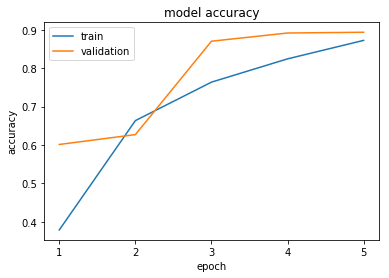

In [40]:
plot_accuracy(history5)

In [41]:
train_acc5, test_acc5 = train_and_test_accuracy(history5, model5)

## Compare models on train and test accuracy

In [42]:
train_acc = [train_acc1, train_acc2, train_acc3, train_acc4, train_acc5]
test_acc = [test_acc1, test_acc2, test_acc3, test_acc4, test_acc5]

In [43]:
def plot_model_accuracy(train_acc, test_acc):
    x = [1, 2, 3, 4, 5]
    plt.plot(x, train_acc)
    plt.plot(x, test_acc)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xticks(x)
    plt.xlabel('models')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

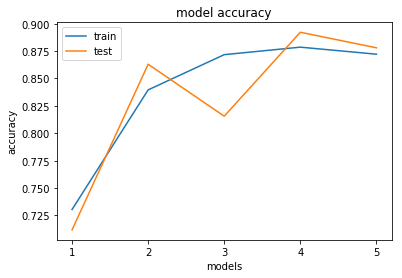

In [44]:
plot_model_accuracy(train_acc, test_acc)

## Early Stopping

In [45]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='min')

In [46]:
history1_e = fit_model(model1, [early_stopping])

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
1s - loss: 0.8763 - acc: 0.7498 - val_loss: 0.7950 - val_acc: 0.7820
Epoch 2/5
1s - loss: 0.8269 - acc: 0.7624 - val_loss: 0.7671 - val_acc: 0.7880
Epoch 3/5
1s - loss: 0.7809 - acc: 0.7713 - val_loss: 0.7201 - val_acc: 0.7937
Epoch 4/5
1s - loss: 0.7385 - acc: 0.7842 - val_loss: 0.6894 - val_acc: 0.8053
Epoch 5/5
1s - loss: 0.6960 - acc: 0.7935 - val_loss: 0.6561 - val_acc: 0.8080


In [47]:
history2_e = fit_model(model2, [early_stopping])

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
5s - loss: 0.4244 - acc: 0.8622 - val_loss: 0.4114 - val_acc: 0.8647
Epoch 2/5
5s - loss: 0.3685 - acc: 0.8853 - val_loss: 0.3015 - val_acc: 0.9097
Epoch 3/5
5s - loss: 0.3272 - acc: 0.8972 - val_loss: 0.4536 - val_acc: 0.8433
Epoch 4/5
5s - loss: 0.2849 - acc: 0.9071 - val_loss: 0.2679 - val_acc: 0.9137
Epoch 5/5
5s - loss: 0.2526 - acc: 0.9183 - val_loss: 0.2573 - val_acc: 0.9187


In [48]:
history3_e = fit_model(model3, [early_stopping])

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
9s - loss: 0.3145 - acc: 0.8946 - val_loss: 0.2527 - val_acc: 0.9137
Epoch 2/5
8s - loss: 0.2711 - acc: 0.9124 - val_loss: 0.2387 - val_acc: 0.9273
Epoch 3/5
10s - loss: 0.2373 - acc: 0.9202 - val_loss: 0.3558 - val_acc: 0.8873
Epoch 4/5
8s - loss: 0.2111 - acc: 0.9315 - val_loss: 0.2226 - val_acc: 0.9200
Epoch 5/5
10s - loss: 0.1902 - acc: 0.9369 - val_loss: 0.1728 - val_acc: 0.9450


In [49]:
history4_e = fit_model(model4, [early_stopping])

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
13s - loss: 0.3109 - acc: 0.9007 - val_loss: 0.2549 - val_acc: 0.9153
Epoch 2/5
14s - loss: 0.2637 - acc: 0.9098 - val_loss: 0.3403 - val_acc: 0.8947
Epoch 3/5
14s - loss: 0.2362 - acc: 0.9216 - val_loss: 0.2358 - val_acc: 0.9287
Epoch 4/5
14s - loss: 0.2076 - acc: 0.9297 - val_loss: 0.2195 - val_acc: 0.9267
Epoch 5/5
15s - loss: 0.1808 - acc: 0.9427 - val_loss: 0.2121 - val_acc: 0.9370


In [50]:
history5_e = fit_model(model5, [early_stopping])

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
16s - loss: 0.3424 - acc: 0.8896 - val_loss: 0.7575 - val_acc: 0.7893
Epoch 2/5
16s - loss: 0.2858 - acc: 0.9083 - val_loss: 0.2489 - val_acc: 0.9180
Epoch 3/5
16s - loss: 0.2536 - acc: 0.9201 - val_loss: 0.4870 - val_acc: 0.8720
Epoch 4/5
16s - loss: 0.2311 - acc: 0.9273 - val_loss: 0.2680 - val_acc: 0.9110
Epoch 5/5
16s - loss: 0.1940 - acc: 0.9370 - val_loss: 0.2429 - val_acc: 0.9250


### Callback Early Stopping stops training when a monitored quantity has stopped improving and hence does not run all the epochs saving the training time.

## Dropout

In [51]:
def build_model_with_dropout():
    model = Sequential()
    model.add(Dense(500, activation='relu', input_shape=(16,)))
    model.add(Dropout(0.5))
    model.add(Dense(400, activation='relu', input_shape=(16,)))
    model.add(Dropout(0.5))
    model.add(Dense(26, activation='sigmoid'))
    model.compile(optimizer=RMSprop(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
    return model

In [52]:
dropout_model = build_model_with_dropout()
dropout_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 500)               8500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 26)                10426     
Total params: 219,326
Trainable params: 219,326
Non-trainable params: 0
_________________________________________________________________


In [53]:
dropout_history = fit_model(dropout_model)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
5s - loss: 2.5890 - acc: 0.2379 - val_loss: 1.4694 - val_acc: 0.6413
Epoch 2/5
8s - loss: 1.5655 - acc: 0.5078 - val_loss: 1.0235 - val_acc: 0.7117
Epoch 3/5
8s - loss: 1.2335 - acc: 0.6074 - val_loss: 0.8446 - val_acc: 0.7553
Epoch 4/5
8s - loss: 1.0581 - acc: 0.6628 - val_loss: 0.7129 - val_acc: 0.7863
Epoch 5/5
6s - loss: 0.9501 - acc: 0.6926 - val_loss: 0.6245 - val_acc: 0.8130


### Dropout with callback (early stopping)

In [54]:
dropout_callback_history = fit_model(dropout_model, [early_stopping])

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
7s - loss: 0.8636 - acc: 0.7226 - val_loss: 0.5602 - val_acc: 0.8343
Epoch 2/5
10s - loss: 0.8073 - acc: 0.7394 - val_loss: 0.4911 - val_acc: 0.8573
Epoch 3/5
10s - loss: 0.7539 - acc: 0.7583 - val_loss: 0.4617 - val_acc: 0.8627
Epoch 4/5
9s - loss: 0.7091 - acc: 0.7679 - val_loss: 0.4530 - val_acc: 0.8600
Epoch 5/5
9s - loss: 0.6736 - acc: 0.7832 - val_loss: 0.4233 - val_acc: 0.8733


## Predict Class

### keras api predict

In [55]:
prediction_api = model1.predict_classes(x_test)

4960/5000 [============================>.] - ETA: 0s 

In [56]:
prediction_api

array([ 2, 20, 10, ..., 19, 18,  0])

In [57]:
prediction_api = [chr(i+65) for i in prediction_api]

In [58]:
prediction_api

['C',
 'U',
 'K',
 'N',
 'E',
 'I',
 'V',
 'V',
 'U',
 'D',
 'U',
 'O',
 'P',
 'D',
 'J',
 'Q',
 'Q',
 'J',
 'G',
 'R',
 'I',
 'D',
 'Q',
 'A',
 'D',
 'O',
 'R',
 'O',
 'O',
 'E',
 'F',
 'T',
 'B',
 'C',
 'F',
 'Q',
 'A',
 'B',
 'Q',
 'T',
 'A',
 'M',
 'O',
 'E',
 'H',
 'Q',
 'S',
 'H',
 'H',
 'M',
 'O',
 'J',
 'Z',
 'T',
 'B',
 'T',
 'T',
 'O',
 'L',
 'D',
 'D',
 'Q',
 'W',
 'J',
 'I',
 'M',
 'C',
 'O',
 'I',
 'Q',
 'C',
 'Q',
 'C',
 'O',
 'R',
 'Z',
 'A',
 'D',
 'Y',
 'A',
 'P',
 'Z',
 'O',
 'I',
 'D',
 'J',
 'P',
 'X',
 'E',
 'L',
 'S',
 'H',
 'G',
 'E',
 'U',
 'I',
 'B',
 'T',
 'B',
 'Q',
 'Y',
 'B',
 'L',
 'B',
 'R',
 'Q',
 'X',
 'M',
 'Z',
 'W',
 'G',
 'G',
 'Z',
 'X',
 'M',
 'X',
 'G',
 'G',
 'X',
 'N',
 'P',
 'L',
 'Q',
 'Z',
 'S',
 'F',
 'Y',
 'L',
 'X',
 'X',
 'X',
 'Q',
 'Q',
 'M',
 'Z',
 'Q',
 'M',
 'M',
 'F',
 'E',
 'O',
 'W',
 'G',
 'A',
 'V',
 'L',
 'T',
 'Z',
 'J',
 'P',
 'M',
 'T',
 'G',
 'X',
 'G',
 'G',
 'W',
 'F',
 'R',
 'I',
 'Q',
 'U',
 'X',
 'V',
 'K',
 'J',
 'R'

### own predict function

In [59]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [60]:
def predict(model):
    x_test_h = np.hstack([x_test, np.zeros(x_test.shape[0]).reshape(x_test.shape[0], 1)])
    x_test_h[:, -1] = 1
    
    weights1 = np.vstack([model.get_weights()[0], model.get_weights()[1]]) 
    prediction = np.dot(x_test_h, weights1)
    # ReLU
    prediction[prediction < 0] = 0   
    prediction = np.hstack([prediction, np.zeros(prediction.shape[0]).reshape(prediction.shape[0], 1)])
    prediction[:, -1] = 1
    
    weights2 = np.vstack([model.get_weights()[2], model.get_weights()[3]])
    prediction = np.dot(prediction, weights2)
    # Sigmoid
    prediction = sigmoid(prediction)
    
    return prediction.argmax(axis=-1)

In [61]:
prediction = predict(model1)

In [62]:
prediction

array([ 2, 20, 10, ..., 19, 18,  0])

In [63]:
prediction = [chr(i+65) for i in prediction]

In [64]:
prediction

['C',
 'U',
 'K',
 'N',
 'E',
 'I',
 'V',
 'V',
 'U',
 'D',
 'U',
 'O',
 'P',
 'D',
 'J',
 'Q',
 'Q',
 'J',
 'G',
 'R',
 'I',
 'D',
 'Q',
 'A',
 'D',
 'O',
 'R',
 'O',
 'O',
 'E',
 'F',
 'T',
 'B',
 'C',
 'F',
 'Q',
 'A',
 'B',
 'Q',
 'T',
 'A',
 'M',
 'O',
 'E',
 'H',
 'Q',
 'S',
 'H',
 'H',
 'M',
 'O',
 'J',
 'Z',
 'T',
 'B',
 'T',
 'T',
 'O',
 'L',
 'D',
 'D',
 'Q',
 'W',
 'J',
 'I',
 'M',
 'C',
 'O',
 'I',
 'Q',
 'C',
 'Q',
 'C',
 'O',
 'R',
 'Z',
 'A',
 'D',
 'Y',
 'A',
 'P',
 'Z',
 'O',
 'I',
 'D',
 'J',
 'P',
 'X',
 'E',
 'L',
 'S',
 'H',
 'G',
 'E',
 'U',
 'I',
 'B',
 'T',
 'B',
 'Q',
 'Y',
 'B',
 'L',
 'B',
 'R',
 'Q',
 'X',
 'M',
 'Z',
 'W',
 'G',
 'G',
 'Z',
 'X',
 'M',
 'X',
 'G',
 'G',
 'X',
 'N',
 'P',
 'L',
 'Q',
 'Z',
 'S',
 'F',
 'Y',
 'L',
 'X',
 'X',
 'X',
 'Q',
 'Q',
 'M',
 'Z',
 'Q',
 'M',
 'M',
 'F',
 'E',
 'O',
 'W',
 'G',
 'A',
 'V',
 'L',
 'T',
 'Z',
 'J',
 'P',
 'M',
 'T',
 'G',
 'X',
 'G',
 'G',
 'W',
 'F',
 'R',
 'I',
 'Q',
 'U',
 'X',
 'V',
 'K',
 'J',
 'R'